In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

plt.rcParams["figure.figsize"] = (3, 3)
%matplotlib notebook

Fd3m

5

 0  1  1   0.0

 0  1 -1   0.0

 1 -1  0   0.0

-1 -1  0  -0.5

 0 -1  0  -0.125

xZY  0 0 0  1

xzy  0 0 0  1

yxz  0 0 0  1

YXz  1 1 0  2

ZYX  1 1 1  4

5

xZY  0 0 0  1

xzy  0 0 0  1

yxz  0 0 0  1

YXz  1 1 0  2

ZYX  1 1 1  4

9

i 192  3  0 0 0  1   1 0 0  0 1 0  0 0 1

h  96  1  1 0 2  8   0 1 -1

g  96  2  0 0 0  1   1 1 0  0 0 1

f  48  1  0 0 0  1   1 0 0

e  32  1  0 0 0  1   1 1 1

d  16  0  5 5 5  8

c  16  0  1 1 1  8

b   8  0  1 1 1  2

a   8  0  0 0 0  1


In [2]:
asymmetric_unit_dict = {}
symmetry_operations_dict = {}
wyckoff_positions_dict = {}
with open('CUBIC.DAT') as f:
    while True:
        group_name = f.readline().strip()
        if group_name == 'HALT':
            break
        n = int(f.readline())
        asymmetric_unit = []
        for i in range(n):
            a, b, c, d = (float(t) for t in f.readline().split())
            asymmetric_unit.append((np.array([a, b, c]),d))
        back_symmetry_operations = []
        for i in range(n):
            syms, *tail = f.readline().split()
            dx, dy, dz, denom = (float(t) for t in tail)
            matrix = np.zeros((3, 3))
            for i in range(3):
                mult = 1 if syms[i].islower() else -1
                ptr = ord(syms[i].lower()) - ord('x')
                matrix[i][ptr] = mult
            dd = np.array([dx, dy, dz]) / denom
            back_symmetry_operations.append((matrix, dd))
        m = int(f.readline())
        symmetry_operations = []
        for i in range(m):
            syms, *tail = f.readline().split()
            dx, dy, dz, denom = (float(t) for t in tail)
            matrix = np.zeros((3, 3))
            for i in range(3):
                mult = 1 if syms[i].islower() else -1
                ptr = ord(syms[i].lower()) - ord('x')
                matrix[i][ptr] = mult
            dd = np.array([dx, dy, dz]) / denom
            symmetry_operations.append((matrix, dd))
        k = int(f.readline())
        wyckoff_positions = {}
        for i in range(k):
            name, mult, dims, *tail = f.readline().split()
            x, y, z, denom, *freedoms = (float(t) for t in tail)
            pos = np.array([x, y, z]) / denom
            wyckoff_positions[name] = (int(mult), pos, [np.array(freedoms[j:j+3]) / denom for j in range(int(dims))])
        asymmetric_unit_dict[group_name] = asymmetric_unit
        symmetry_operations_dict[group_name] = symmetry_operations
        wyckoff_positions_dict[group_name] = wyckoff_positions

In [3]:
def build_atoms(group, base_positions, free_variables):
    wyckoff_positions = wyckoff_positions_dict[group]
    symmetry_operations = symmetry_operations_dict[group]
    all_atoms = []
    var_ptr = 0
    for (pos, name, radius) in base_positions:
        local_atoms = []
        actual_positions = wyckoff_positions[pos][1].copy()
        for (i, add) in enumerate(wyckoff_positions[pos][2]):
            actual_positions += free_variables[var_ptr * i] * add
        var_ptr += len(wyckoff_positions[pos][2])
        q = deque()
        q.append(actual_positions)
        local_atoms.append((actual_positions, name, radius))
        while q:
            cur_pos = q.popleft()
            for (matrix, add) in symmetry_operations:
                next_pos = np.remainder(np.dot(matrix, cur_pos) + add, 1)
                is_new = True
                for (other_pos, other_name, other_radius) in local_atoms:
                    distance = np.linalg.norm(np.remainder(next_pos - other_pos + 0.5, 1) - 0.5)
                    is_new = is_new and distance > 1e-8
                if is_new:
                    local_atoms.append((next_pos, name, radius))
                    q.append(next_pos)
        all_atoms += local_atoms
    return all_atoms

0 6.5 0.6912137110498755 0.894
1 8.25 0.07320238429283288 0.89
2 9.125 0 0.353
3 8.6875 0 0.358
4 8.46875 0.006437261276150075 0.36
5 8.578125 0 0.359
6 8.5234375 0 0.36
7 8.49609375 0 0.36
8 8.482421875 0.00312200777728755 0.36
9 8.4892578125 0.0014643810278562874 0.36
8.4892578125 8.49609375
(array([0.5, 0.5, 0.5]), 'Fe', 0.74)
(array([0. , 0. , 0.5]), 'Fe', 0.74)
(array([0.75, 0.75, 0.75]), 'Fe', 0.74)
(array([0. , 0.5, 0. ]), 'Fe', 0.74)
(array([0.75, 0.25, 0.25]), 'Fe', 0.74)
(array([0.5, 0. , 0. ]), 'Fe', 0.74)
(array([0.25, 0.75, 0.25]), 'Fe', 0.74)
(array([0.25, 0.25, 0.75]), 'Fe', 0.74)
(array([0.125, 0.125, 0.125]), 'Al', 0.51)
(array([0.125, 0.875, 0.875]), 'Al', 0.51)
(array([0.375, 0.375, 0.125]), 'Al', 0.51)
(array([0.875, 0.125, 0.875]), 'Al', 0.51)
(array([0.625, 0.375, 0.875]), 'Al', 0.51)
(array([0.375, 0.875, 0.625]), 'Al', 0.51)
(array([0.375, 0.125, 0.375]), 'Al', 0.51)
(array([0.875, 0.875, 0.125]), 'Al', 0.51)
(array([0.375, 0.625, 0.875]), 'Al', 0.51)
(array([0.

<IPython.core.display.Javascript object>


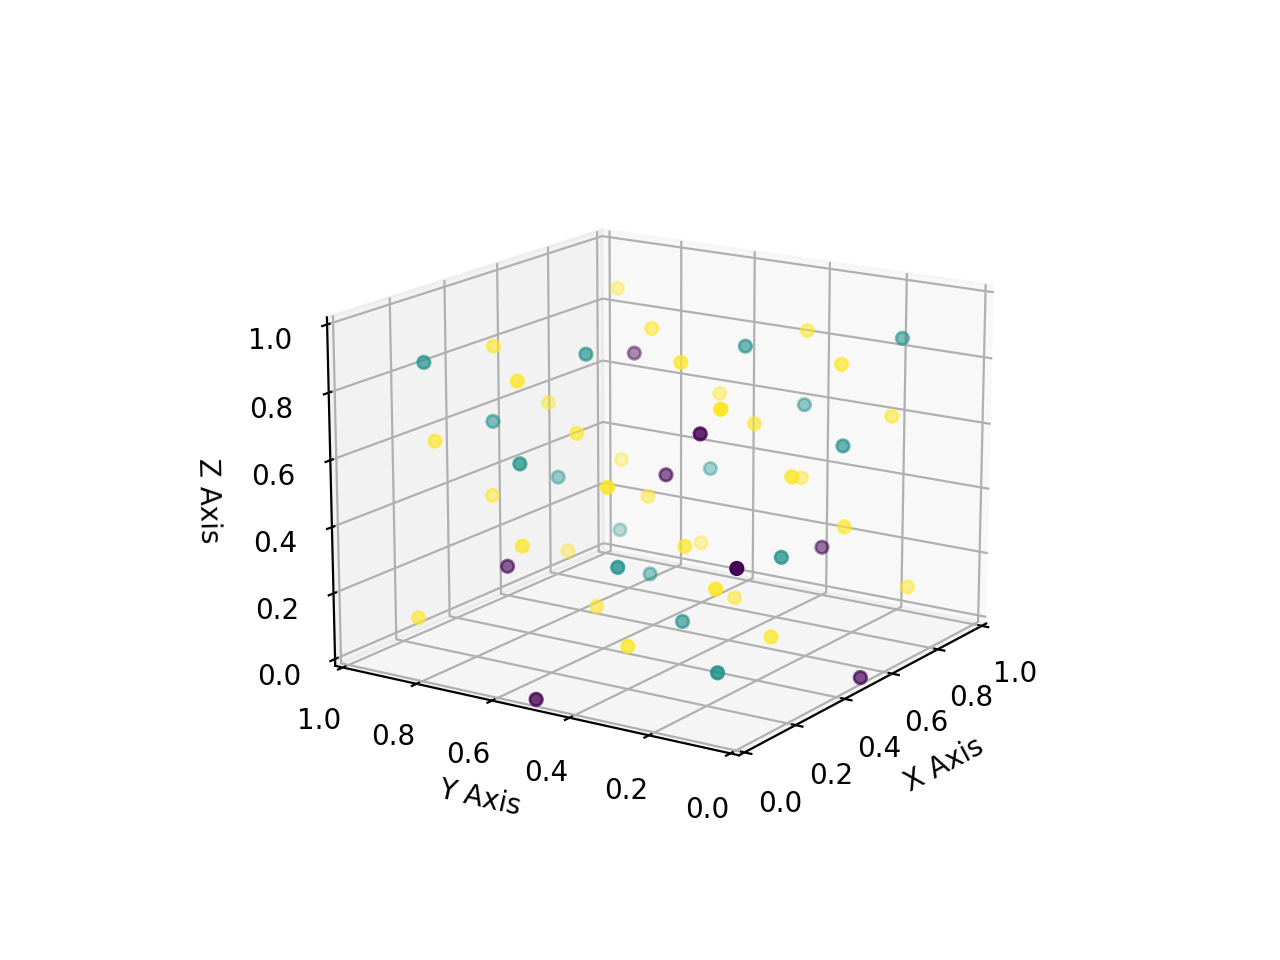

In [4]:
group_name = 'Fd3m'
base_positions = [
    ('b', 'Fe', 0.74),
    ('c', 'Al', 0.51),
    ('e', 'O', 1.32),
]
low_a = 3
high_a = 10
best_vars = []
penalties = []
var_steps = 1000

free_variables_count = 0
total_atoms_count = 0
min_len = 1000
for (pos, name, radius) in base_positions:
    free_variables_count += len(wyckoff_positions_dict[group_name][pos][2])
    for direction in wyckoff_positions_dict[group_name][pos][2]:
        min_len = min(min_len, np.linalg.norm(direction))
    total_atoms_count += wyckoff_positions_dict[group_name][pos][0] 

for step in range(10):
    real_a = (low_a + high_a) * 0.5
    lowest = 1e10
    res = 0
    skip_to = 0
    penalties = []
    for ptr in range(var_steps + 1):
        if ptr < skip_to:
            continue
        all_atoms = build_atoms(group_name, base_positions, [ptr / var_steps])
        if len(all_atoms) != total_atoms_count:
            continue
        penalty = 0
        for i in range(len(all_atoms)):
            for j in range(i):
                pos_i = all_atoms[i][0]
                pos_j = all_atoms[j][0]
                radius_i = all_atoms[i][2]
                radius_j = all_atoms[j][2]
                distance = real_a * np.linalg.norm(np.remainder(pos_i - pos_j + 0.5, 1) - 0.5)
                penalty = max(penalty, radius_i + radius_j - distance)
        if penalty < lowest:
            lowest = penalty
            res = ptr
            if lowest == 0:
                break
        skip_to = ptr + penalty / real_a / min_len / 2 * var_steps
    print(step, real_a, lowest, res / var_steps)
    best_vars = [res / var_steps]
    if lowest == 0:
        high_a = real_a 
    else:
        low_a = real_a 

print(low_a, high_a)

all_atoms = build_atoms(group_name, base_positions, best_vars)
for atom in all_atoms:
    print(atom)
print(len(all_atoms))

xs = [pos[0] for (pos, name, radius) in all_atoms]
ys = [pos[1] for (pos, name, radius) in all_atoms] 
zs = [pos[2] for (pos, name, radius) in all_atoms]
color = [(0 if name == 'Fe' else (1 if name == 'Al' else 2)) for (pos, name, radius) in all_atoms]
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(xs, ys, zs, c = color)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

In [6]:
8.4892578125 / 2 + 8.49609375 / 2

8.49267578125